In [3]:
L = [3, 1, 4, 1, 5, 9, 2, 6]
sorted(L) #returns a sorted copy

[1, 1, 2, 3, 4, 5, 6, 9]

In [11]:
L.sort() #acts in-place and returns None
print(L)

[1, 1, 2, 3, 4, 5, 6, 9]


In [12]:
sorted('python')

['h', 'n', 'o', 'p', 't', 'y']

In [13]:
import numpy as np
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [15]:
x.sort() #acts in-place
print(x)

[1 2 3 4 5]


In [16]:
x = np.array([2, 1, 4, 5, 3])
i = np.argsort(x)
print(i)

[1 0 4 2 3]


In [17]:
x[i]

array([1, 2, 3, 4, 5])

In [18]:
rng = np.random.default_rng(seed=42)
X = rng.integers(0, 10, (4, 6))
print(X)

[[0 7 6 4 4 8]
 [0 6 2 0 5 9]
 [7 7 7 7 5 1]
 [8 4 5 3 1 9]]


In [19]:
np.sort(X, axis=0)

array([[0, 4, 2, 0, 1, 1],
       [0, 6, 5, 3, 4, 8],
       [7, 7, 6, 4, 5, 9],
       [8, 7, 7, 7, 5, 9]])

In [20]:
np.sort(X, axis=1)

array([[0, 4, 4, 6, 7, 8],
       [0, 0, 2, 5, 6, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]])

In [24]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3) # partial sorting but only replace the small ones to the left side

array([2, 1, 3, 4, 6, 5, 7])

In [25]:
np.partition(X, 2, axis=1)

array([[0, 4, 4, 7, 6, 8],
       [0, 0, 2, 6, 5, 9],
       [1, 5, 7, 7, 7, 7],
       [1, 3, 4, 5, 8, 9]])

In [28]:
i = np.argpartition(X, 2, axis=1)
print(i)

[[0 3 4 1 2 5]
 [0 3 2 1 4 5]
 [5 4 2 3 1 0]
 [4 3 1 2 0 5]]


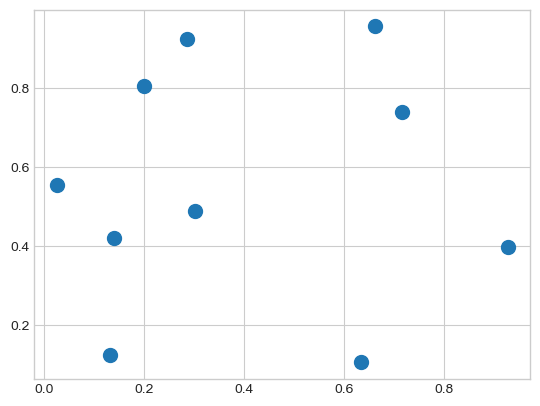

In [61]:
X = rng.random((10, 2))

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
plt.scatter(X[:, 0], X[:, 1], s=100);

In [62]:
dist_sq = np.sum((X[:, np.newaxis] - X[np.newaxis, :]) ** 2, axis=-1)

In [63]:
differences = X[:, np.newaxis] - X[np.newaxis, :]
differences.shape

(10, 10, 2)

In [64]:
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [65]:
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [66]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [67]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 6 7 4 9 5 1 2 8 3]
 [1 5 3 6 4 0 8 9 7 2]
 [2 9 4 7 8 0 6 3 1 5]
 [3 1 8 5 4 9 6 0 2 7]
 [4 9 7 0 2 6 1 8 5 3]
 [5 1 6 0 4 3 9 7 8 2]
 [6 0 5 4 7 1 9 2 3 8]
 [7 9 4 0 2 6 1 5 8 3]
 [8 3 2 4 9 1 7 0 5 6]
 [9 4 7 2 0 6 8 1 5 3]]


In [68]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

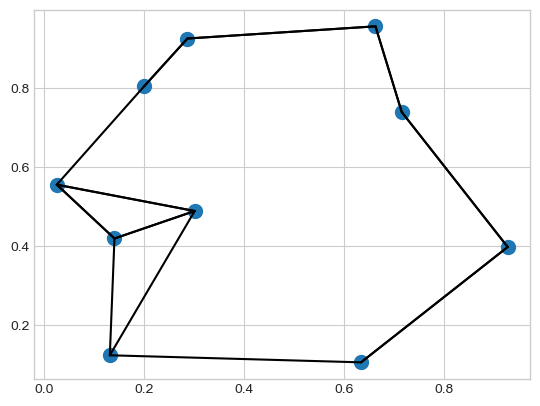

In [69]:
plt.scatter(X[:, 0], X[:, 1], s=100)
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')